In [65]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler



In [5]:
Bank_data=pd.read_csv(r'Bank_Customer_retirement.csv')

In [6]:
Bank_data.head()

,Customer ID,Age,Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [8]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  500 non-null    int64  
 1   Age          500 non-null    float64
 2   Savings      500 non-null    float64
 3   Retire       500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [9]:
Bank_data.describe()

,Customer ID,Age,Savings,Retire
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,46.757077,534984.465804,0.500000
std,144.481833,7.790125,187675.818881,0.500501
min,0.000000,25.000000,10.000000,0.000000
25%,124.750000,41.299451,382626.524425,0.000000
50%,249.500000,46.695770,534512.984350,0.500000
75%,374.250000,52.322551,680670.257025,1.000000
max,499.000000,70.000000,1000000.000000,1.000000


In [10]:
Bank_data.drop('Customer ID',axis=1,inplace=True)

In [11]:
Bank_data.head()

,Age,Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1


In [12]:
Bank_data.isna().sum()

Age        0
Savings    0
Retire     0
dtype: int64

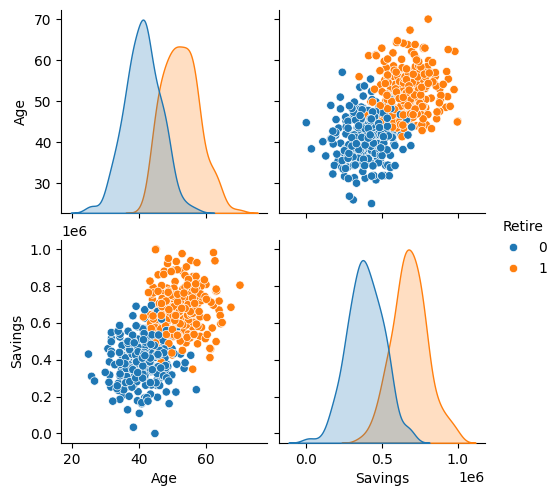

In [14]:
###EDA
sns.pairplot(Bank_data,hue='Retire',vars=['Age','Savings'])

In [16]:
vc=Bank_data['Retire'].value_counts()
vc.info

<bound method Series.info of Retire
0    250
1    250
Name: count, dtype: int64>

(0.0, 300.0)

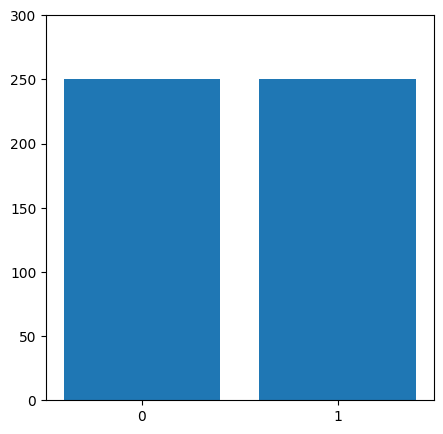

In [33]:
plt.figure(figsize=(5,5))
plt.bar(height=vc.values,x=vc.index)
plt.xticks(vc.index, vc.index)
plt.ylim(0,300)
#plt.title('Retirement Distribution')

In [35]:
X=Bank_data.drop('Retire',axis=1)

In [36]:
y=Bank_data['Retire']

In [37]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: Retire
Non-Null Count  Dtype
--------------  -----
500 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)

In [43]:
X_train,X_test,y_train,y_test

(           Age      Savings
 412  56.862135  673809.7988
 81   49.824562  459515.9887
 363  39.654007  406512.4698
 31   59.905270  807629.8529
 158  43.992136  755527.2073
 ..         ...          ...
 289  49.315006  558200.5592
 109  39.979516  348249.4573
 395  56.368495  537126.8504
 480  64.703339  601611.9322
 176  31.787663  547443.7542
 
 [375 rows x 2 columns],
            Age      Savings
 331  38.189185  345996.4572
 374  62.573031  936001.5611
 434  50.116297  638267.8972
 354  45.383682  325403.3613
 345  45.071186  274922.2915
 ..         ...          ...
 168  41.938806  510616.9778
 337  37.969684  429802.1662
 20   44.929077  667652.0741
 99   43.633374  443370.8054
 37   62.135899  980549.6557
 
 [125 rows x 2 columns],
 412    1
 81     0
 363    0
 31     1
 158    1
       ..
 289    0
 109    0
 395    1
 480    1
 176    0
 Name: Retire, Length: 375, dtype: int64,
 331    0
 374    1
 434    1
 354    0
 345    0
       ..
 168    0
 337    0
 20     1
 99     

In [46]:
Mod=SVC()
Mod.fit(X_train,y_train)

SVC()

In [48]:
y_pred=Mod.predict(X_test)

In [54]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

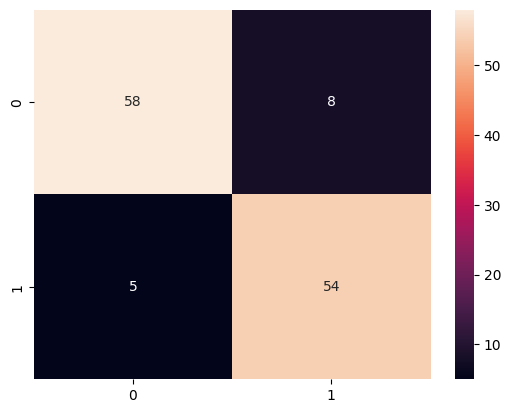

In [56]:
sns.heatmap(cm,annot=True)

In [58]:
accuracy=accuracy_score(y_test,y_pred)

In [59]:
accuracy

0.896

In [66]:
sc=StandardScaler()

In [67]:
X_test1=sc.fit_transform(X_test)

In [68]:
X_train1=sc.fit_transform(X_train)

In [69]:
Mod1=SVC()
Mod1.fit(X_train1,y_train)

SVC()

In [71]:
y_Pred1=Mod1.predict(X_test1)

In [73]:
accuracy_score(y_test,y_Pred1)

0.944